In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
Import_and_Export = pd.read_excel("../00_Data/Original_data/Import_and_Export.xlsx")
Import_and_Export.head()

,Date,Export price,Export growth rate,Import price,Import growth rate
0,2011년 1월,44465366,44.7,41981323,13.6
1,2011년 2월,38467412,16.4,36401588,11.2
2,2011년 3월,48052991,28.8,45565952,15.4
3,2011년 4월,48536725,23.5,44188522,29.4
4,2011년 5월,47331329,21.7,45284932,28.7


In [23]:
Import_and_Export.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                156 non-null    object 
 1   Export price        156 non-null    int64  
 2   Export growth rate  156 non-null    float64
 3   Import price        156 non-null    int64  
 4   Import growth rate  156 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.2+ KB


In [24]:
Import_and_Export_drop = Import_and_Export.dropna()
Import_and_Export_drop

,Date,Export price,Export growth rate,Import price,Import growth rate
0,2011년 1월,44465366,44.7,41981323,13.6
1,2011년 2월,38467412,16.4,36401588,11.2
2,2011년 3월,48052991,28.8,45565952,15.4
3,2011년 4월,48536725,23.5,44188522,29.4
4,2011년 5월,47331329,21.7,45284932,28.7
...,...,...,...,...,...
151,2023년 8월,51994074,-8.1,51009758,-22.7
152,2023년 9월,54650691,-4.4,50972525,-16.5
153,2023년 10월,54989950,4.9,53440582,-9.7
154,2023년 11월,55561090,7.3,51997805,-11.6


In [25]:
Import_and_Export_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                156 non-null    object 
 1   Export price        156 non-null    int64  
 2   Export growth rate  156 non-null    float64
 3   Import price        156 non-null    int64  
 4   Import growth rate  156 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 6.2+ KB


In [26]:
Import_and_Export_drop.describe()

,Export price,Export growth rate,Import price,Import growth rate
count,1.560000e+02,156.000000,1.560000e+02,156.000000
mean,4.776320e+07,3.277564,4.452262e+07,4.480128
std,5.341876e+06,13.826452,7.527299e+06,16.391364
min,3.485451e+07,-25.600000,2.916332e+07,-25.300000
25%,4.469710e+07,-6.300000,3.928658e+07,-6.725000
50%,4.704548e+07,1.850000,4.372810e+07,1.150000
75%,5.090269e+07,11.025000,4.746078e+07,15.850000
max,6.378684e+07,45.500000,6.602773e+07,44.000000


In [27]:
Import_and_Export_drop.dtypes

Date                   object
Export price            int64
Export growth rate    float64
Import price            int64
Import growth rate    float64
dtype: object

In [28]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d

# Define a function to convert and save the date column data into datetime format
def convert_and_save_date(row):
    year_month_str = row['Date'].replace(' ', '')  # Remove whitespace
    
    # Convert the 'YYYY년MM월' formatted string to datetime format and return
    return datetime.strptime(year_month_str, '%Y년%m월')

# Apply the conversion function to the 'Date' column
Import_and_Export_drop['Date'] = Import_and_Export_drop.apply(convert_and_save_date, axis=1)

# Define a function to expand monthly data to daily data and apply interpolation
def expand_and_interpolate_monthly_data(df):    
    # Get the first and last dates of the dataframe
    start_date = df['Date'].iloc[0]
    end_date = df['Date'].iloc[-1] + pd.offsets.MonthEnd(1)  # Set to the end of the next month of the last date
    
    sorted_indices = np.argsort(df['Date'])
    sorted_dates = [df['Date'][i] for i in sorted_indices]

    # Create a new dataframe to expand dates to daily frequency
    expanded_df = pd.DataFrame({'Date': pd.date_range(start=start_date, end=end_date, freq='D')})
    
    # Apply linear interpolation to each column of monthly data
    for col in df.columns[1:]:
        sorted_values = [df[col][i] for i in sorted_indices]
        f = interp1d(np.linspace(0, len(sorted_dates) - 1, len(sorted_dates)), sorted_values, kind='linear')
        expanded_df[col] = f(np.linspace(0, len(sorted_dates) - 1, len(expanded_df)))

    return expanded_df

# Expand monthly data to daily data and apply interpolation
expand_and_interpolate_Import_and_Export_drop = expand_and_interpolate_monthly_data(Import_and_Export_drop)


# Print the result
print(expand_and_interpolate_Import_and_Export_drop.head(30))


         Date  Export price  Export growth rate  Import price  \
0  2011-01-01  4.446537e+07           44.700000  4.198132e+07   
1  2011-01-02  4.426952e+07           43.775943  4.179913e+07   
2  2011-01-03  4.407367e+07           42.851885  4.161694e+07   
3  2011-01-04  4.387783e+07           41.927828  4.143475e+07   
4  2011-01-05  4.368198e+07           41.003771  4.125256e+07   
5  2011-01-06  4.348613e+07           40.079714  4.107037e+07   
6  2011-01-07  4.329029e+07           39.155656  4.088818e+07   
7  2011-01-08  4.309444e+07           38.231599  4.070599e+07   
8  2011-01-09  4.289859e+07           37.307542  4.052380e+07   
9  2011-01-10  4.270275e+07           36.383484  4.034161e+07   
10 2011-01-11  4.250690e+07           35.459427  4.015942e+07   
11 2011-01-12  4.231106e+07           34.535370  3.997723e+07   
12 2011-01-13  4.211521e+07           33.611312  3.979504e+07   
13 2011-01-14  4.191936e+07           32.687255  3.961284e+07   
14 2011-01-15  4.172352e+

In [29]:
expand_and_interpolate_Import_and_Export_drop

,Date,Export price,Export growth rate,Import price,Import growth rate
0,2011-01-01,4.446537e+07,44.700000,4.198132e+07,13.600000
1,2011-01-02,4.426952e+07,43.775943,4.179913e+07,13.521635
2,2011-01-03,4.407367e+07,42.851885,4.161694e+07,13.443269
3,2011-01-04,4.387783e+07,41.927828,4.143475e+07,13.364904
4,2011-01-05,4.368198e+07,41.003771,4.125256e+07,13.286539
...,...,...,...,...,...
4743,2023-12-27,5.731039e+07,5.300400,5.297591e+07,-10.991426
4744,2023-12-28,5.737609e+07,5.225300,5.301265e+07,-10.968570
4745,2023-12-29,5.744179e+07,5.150200,5.304938e+07,-10.945713
4746,2023-12-30,5.750749e+07,5.075100,5.308612e+07,-10.922857


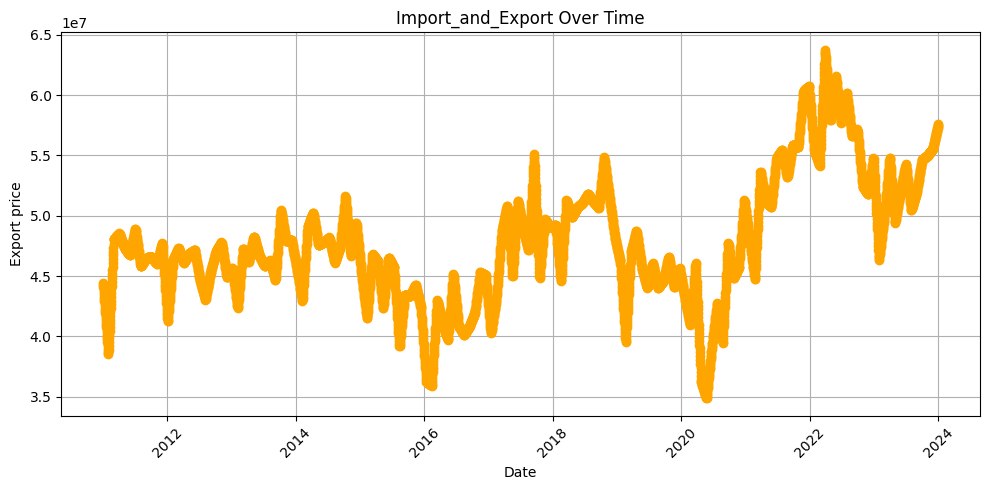

In [30]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(expand_and_interpolate_Import_and_Export_drop['Date'], expand_and_interpolate_Import_and_Export_drop['Export price'], marker='o', color='orange')
plt.title('Import_and_Export Over Time')
plt.xlabel('Date')
plt.ylabel('Export price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

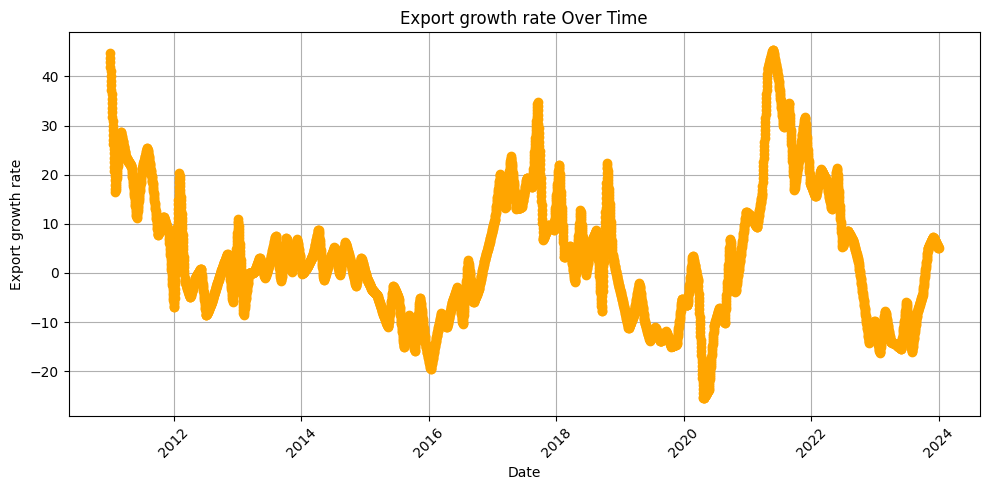

In [31]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(expand_and_interpolate_Import_and_Export_drop['Date'], expand_and_interpolate_Import_and_Export_drop['Export growth rate'], marker='o', color='orange')
plt.title('Export growth rate Over Time')
plt.xlabel('Date')
plt.ylabel('Export growth rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

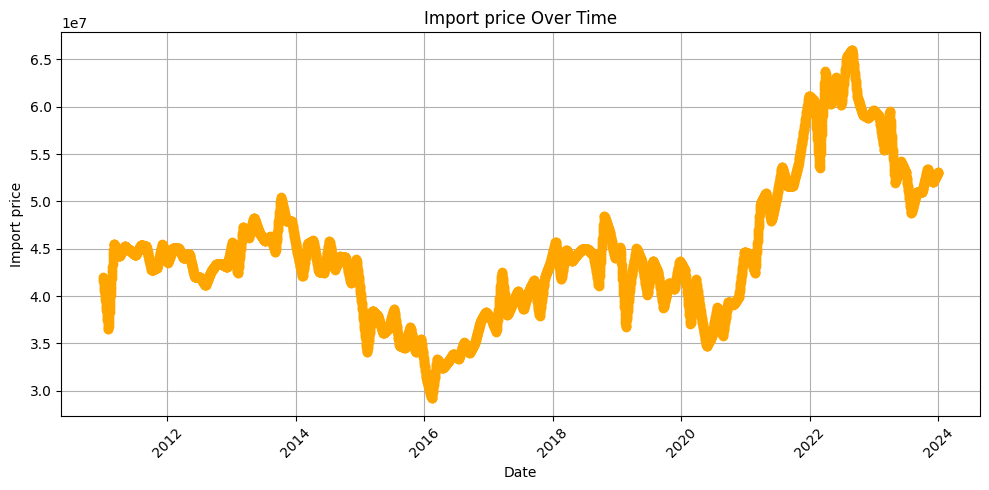

In [32]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(expand_and_interpolate_Import_and_Export_drop['Date'], expand_and_interpolate_Import_and_Export_drop['Import price'], marker='o', color='orange')
plt.title('Import price Over Time')
plt.xlabel('Date')
plt.ylabel('Import price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

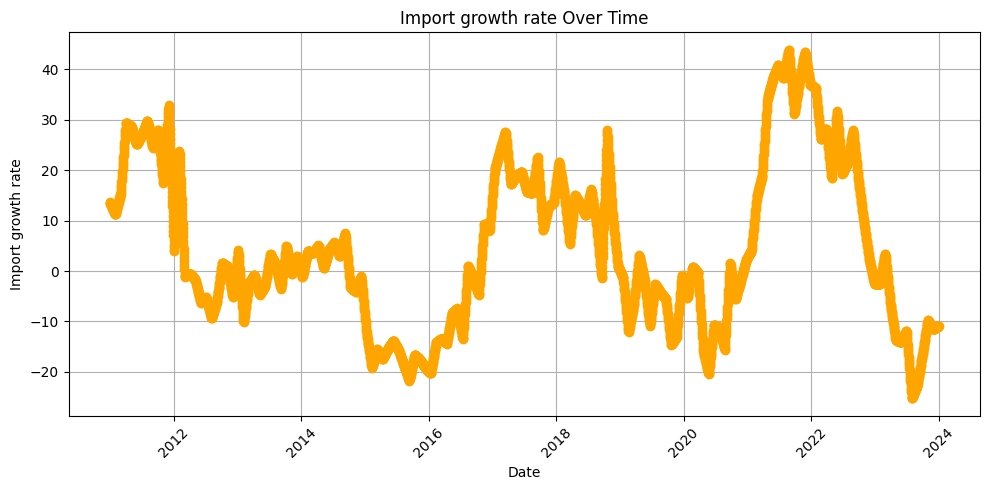

In [33]:
# Visualization
plt.figure(figsize=(10, 5))
plt.plot(expand_and_interpolate_Import_and_Export_drop['Date'], expand_and_interpolate_Import_and_Export_drop['Import growth rate'], marker='o', color='orange')
plt.title('Import growth rate Over Time')
plt.xlabel('Date')
plt.ylabel('Import growth rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [34]:
# Create excel file

expand_and_interpolate_Import_and_Export_drop['Date'] = expand_and_interpolate_Import_and_Export_drop['Date'].dt.strftime('%Y-%m-%d')

expand_and_interpolate_Import_and_Export_drop.to_excel("../00_Data/Transformed_data/Interpolate_Import_and_Export_drop.xlsx")